# Question 2

### Loading the Data set

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

data = load_wine()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Performing exploratory data analysis 

#### Noting the Shape: We examine the shape of our dataset. Noting all the different attributes.

In [156]:
instances_count, attributes_count = df.shape
instances_count, attributes_count

(178, 14)

In [157]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

#### Summary information: We should first examine the complete dataset. This arrangement of information—from the big picture to the specifics—is crucial.

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

#### Missing Values: Here, we count the number of missing values. By combining the "isnull()" and "any()" functions in pandas, we can verify it.

In [159]:
pd.isnull(df).any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
target                          False
dtype: bool

#### Check Basic Descriptive Statistics values: In particular, it is important to pay close attention to the "mean" and "std."

In [160]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


#### Check the target's Histogram Distribution:

<AxesSubplot:xlabel='target', ylabel='count'>

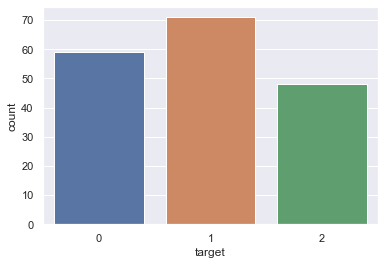

In [176]:
sns.countplot(x="target", data=df)

#### Check the Correlation between attributes:

In [162]:
pearson = df.corr(method='pearson')
# assume target attr is the last, then remove corr with itself
corr_with_target = pearson.iloc[-1][:-1]
# attributes sorted from the most predictive
predictivity = corr_with_target.sort_values()
corr_with_target[abs(corr_with_target).argsort()[::-1]]

flavanoids                     -0.847498
od280/od315_of_diluted_wines   -0.788230
total_phenols                  -0.719163
proline                        -0.633717
hue                            -0.617369
alcalinity_of_ash               0.517859
proanthocyanins                -0.499130
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
alcohol                        -0.328222
color_intensity                 0.265668
magnesium                      -0.209179
ash                            -0.049643
Name: target, dtype: float64

#### Check the attributes distribution

array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'malic_acid'}>,
        <AxesSubplot:title={'center':'ash'}>,
        <AxesSubplot:title={'center':'alcalinity_of_ash'}>],
       [<AxesSubplot:title={'center':'magnesium'}>,
        <AxesSubplot:title={'center':'total_phenols'}>,
        <AxesSubplot:title={'center':'flavanoids'}>,
        <AxesSubplot:title={'center':'nonflavanoid_phenols'}>],
       [<AxesSubplot:title={'center':'proanthocyanins'}>,
        <AxesSubplot:title={'center':'color_intensity'}>,
        <AxesSubplot:title={'center':'hue'}>,
        <AxesSubplot:title={'center':'od280/od315_of_diluted_wines'}>],
       [<AxesSubplot:title={'center':'proline'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

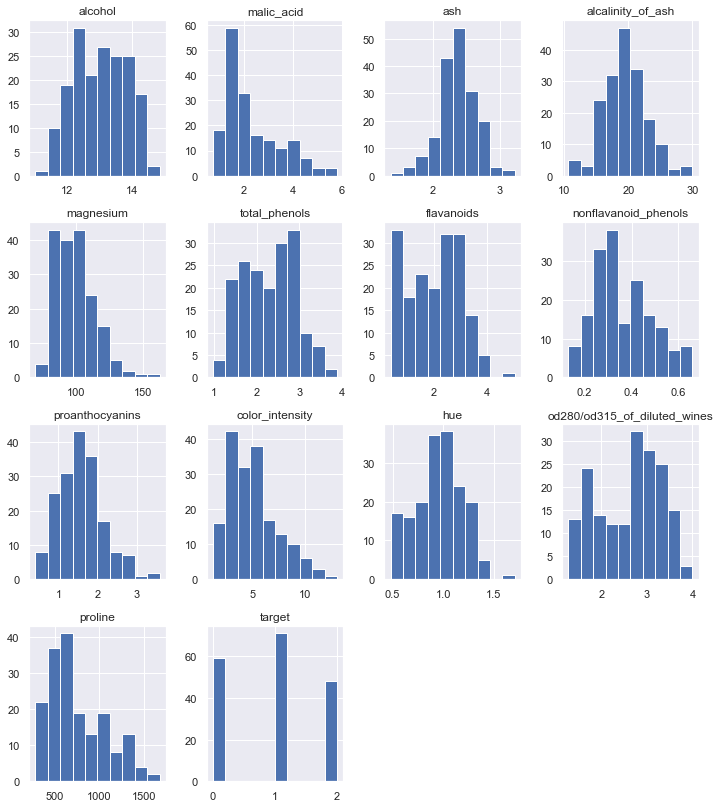

In [163]:
sns.set()
df.hist(figsize=(12,14))

#### Train Test Split: Let's divide our data into training and testing sets using the train test split function from model selection in SciKit Learn.

In [164]:
X = df.drop(['target'],axis=1).values
y = df['target'].values

In [165]:
#Train and test splitting of data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#### Data Preprocessing:

If the data is not normalized, the neural network in Python may struggle to converge before the allotted amount of iterations. Because the multi-layer perceptron is sensitive to feature scaling, scaling your data is strongly advised. Keep in mind that for meaningful findings, the test set must also use the same scaling. There are numerous approaches to normalizing data; however, we'll standardize using the built-in StandardScaler.

In [166]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)   

### Training the Model of Neural Network

We first construct a model object, and then you pass a tuple containing the number of neurons you want at each layer into the hidden_layer_sizes argument. The nth entry in the tuple corresponds to the number of neurons in the nth layer of the MLP model. There are numerous methods to choose these values, but as required in the question, we will pick two layers with as many neurons as there are features in our data collection and a maximum of 1000 iterations.

In [167]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(13,13),activation='logistic', solver='lbfgs', random_state=1, max_iter=1000, verbose=True).fit(X_train, y_train)
print(model.score(X_train, y_train))

1.0


#### Predictions and Evaluation

In [168]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

In [169]:
print(model.score(X_test, y_test))

1.0


In [170]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]


In [171]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



With this confusion matrix we find that all the test set were classified correctly. As there are no false positives or false negatives. The downside however to using a Multi-Layer Perceptron model is how difficult it is to interpret the model itself. The weights and biases won’t be easily interpretable in relation to which features are important to the model itself.

### Naive Bayes Model

In [174]:
from sklearn import naive_bayes, metrics
model = naive_bayes.BernoulliNB()
model.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model.predict(X_test)
print(metrics.confusion_matrix(expected_y, predicted_y))

[[15  0  0]
 [ 1 16  1]
 [ 0  0 12]]


In [175]:
print(model.score(X_test, y_test))

0.9555555555555556


### Comparison of TWO (2) layer neural network vs Naïve Bayes algorithm for Classification in this example

We can note that the model score of The Two Layer Neural Network was perfect, with no wrong classifications. While, on the otherhand, Naïve Bayes algorithm provided us with almost a 96% success rate where only 2 of the testing set were classified incorrectly. This means that we Trained the neural network such that it has better performance as that of the Naïve Bayes algorithm, After doing exploratory data analysis and pre-processing on the dataset.